In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
import tensorflow

from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

C:\Users\thota\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
os.listdir('C://Users//thota//OneDrive//Desktop//uvk Application//cervical fracture')

['train', 'val']

In [8]:
IMAGE_SIZE = [224,224]

train_path = "C://Users//thota//OneDrive//Desktop//uvk Application//cervical fracture//train"
test_path = "C://Users//thota//OneDrive//Desktop//uvk Application//cervical fracture//val"


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./225,
                                  shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip = True)

test_datagen =  ImageDataGenerator(rescale = 1./225)

training_set = train_datagen.flow_from_directory("C://Users//thota//OneDrive//Desktop//uvk Application//cervical fracture//train",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


test_set = test_datagen.flow_from_directory(  "C://Users//thota//OneDrive//Desktop//uvk Application//cervical fracture//val",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3800 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [10]:
base_model = VGG16(input_shape = (224,224,3), weights = 'imagenet', include_top = False)

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
inp = base_model.input

x = base_model.output
x = Flatten()(x)
x = Dense(1024,activation = 'relu')(x)
x = Dropout(0.5)(x)

output = Dense(1,activation = 'softmax')(x)
output = Dense(1,activation = 'sigmoid')(x)

model = Model(inputs = inp, outputs = output)


In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(
loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy']
)

In [16]:
history = model.fit(training_set,batch_size=32,verbose = 1,epochs = 5)

Epoch 1/5
119/119 [==============================] - 325s 3s/step - loss: 0.1080 - accuracy: 0.9726
Epoch 2/5
119/119 [==============================] - 316s 3s/step - loss: 0.0042 - accuracy: 0.9995
Epoch 3/5
119/119 [==============================] - 318s 3s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4/5
119/119 [==============================] - 569s 5s/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/5
119/119 [==============================] - 353s 3s/step - loss: 9.4422e-04 - accuracy: 1.0000


In [17]:
print("Evaluate on Test data")
result = model.evaluate(test_set,batch_size = 32)
print("Test loss, test acc: ",result)

Evaluate on Test data
13/13 [==============================] - 33s 2s/step - loss: 0.0010 - accuracy: 1.0000
Test loss, test acc:  [0.0010046804090961814, 1.0]


In [18]:
model.save('SmartPostureDection.app')

INFO:tensorflow:Assets written to: SmartPostureDection.app\assets


INFO:tensorflow:Assets written to: SmartPostureDection.app\assets


In [20]:
history.history

{'loss': [0.10795977711677551,
  0.004206456709653139,
  0.0015034484677016735,
  0.0010953667806461453,
  0.0009442150476388633],
 'accuracy': [0.972631573677063, 0.9994736909866333, 1.0, 1.0, 1.0]}

In [22]:
from tensorflow.keras.models import load_model
mymodel = load_model('SmartPostureDection.app')

# Plotting

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [24]:
def plot(history):
    fig, axes = plt.subplots(1, 2, figsize = (10,4))
    axes[0].plot(history["loss"], "r-", linewidth = 0.5, label="loss")
    axes[0].set_title("Loss Curve")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Value")
    axes[0].legend(loc="upper right")
    axes[1].plot(history["accuracy"], "b-", linewidth = 0.5, label="accuracy")
    axes[1].set_title("Accuracy Curve")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Value")
    axes[1].legend(loc="upper right")
    #fig.tight_layout()
    fig.show()

C:\Users\thota\AppData\Local\Temp\ipykernel_17724\455605264.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


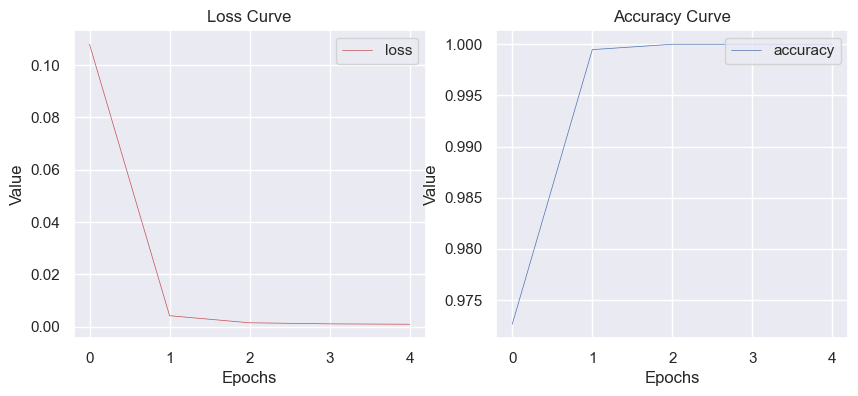

In [25]:
plot(history.history)

# Prediction

In [47]:
import cv2

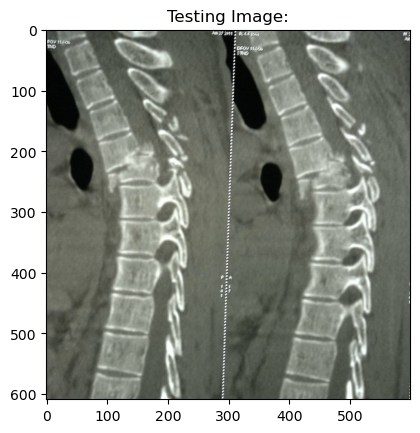

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("C://Users//thota//OneDrive//Desktop//uvk Application//injury.jpg")

# Check if the image is loaded correctly
if img is None:
    print("Error: Unable to load image.")
else:
    plt.imshow(img)
    plt.title("Testing Image:")
    plt.show()  # Display the image


In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [52]:
mymodel = load_model('SmartPostureDection.app')

In [53]:
mymodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
img = image.load_img("C://Users//thota//OneDrive//Desktop//uvk Application//spinal.jpg", target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

img_data = preprocess_input(x)

NameError: name 'image' is not defined

In [60]:
# Assuming mymodel is already defined and img_data is properly prepared image data

# Making predictions
classes = mymodel.predict(img_data)

# Assuming classes[0] contains the predictions for the first sample
# and you want to print out the prediction for the fourth class
if len(classes) > 0 and len(classes[0]) > 4:
    prediction_for_fourth_class = classes[0][3]
    print("Prediction for the fourth class:", prediction_for_fourth_class)
else:
    print("Error: Unable to retrieve prediction for the fourth class.")


1/1 [==============================] - 0s 199ms/step
Error: Unable to retrieve prediction for the fourth class.


In [61]:
# Assuming 'predictions' contains class probabilities for each instance
predicted_classes = classes.argmax(axis=1)  # Get the class index with the highest probability

# Map class indices to class labels (adjust as needed)
class_labels = ['need doctor consultation','not required doctor consultation']
predicted_class_names = [class_labels[idx] for idx in predicted_classes]

# Print the predicted class labels
for instance_idx, predicted_class in enumerate(predicted_class_names):
    print(f"Instance {instance_idx + 1}: Predicted class = {predicted_class}")


Instance 1: Predicted class = need doctor consultation


# Confusion Matrix

In [62]:
test_set = test_datagen.flow_from_directory("C://Users//thota//OneDrive//Desktop//uvk Application//cervical fracture//val",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                           shuffle = False)

Found 400 images belonging to 2 classes.


In [63]:
y_pred = np.argmax(mymodel.predict(test_set), axis = 1)

13/13 [==============================] - 26s 2s/step


In [64]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:
y_test = test_set.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[200   0]
 [200   0]]


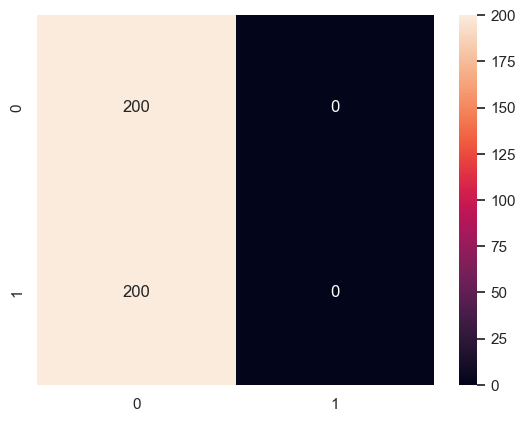

In [68]:
cm = sns.heatmap(cm, annot = True, fmt="d")

In [69]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test, y_pred, target_names = ['need doctor consultation','not required doctor consultation']))

                                  precision    recall  f1-score   support

        need doctor consultation       0.50      1.00      0.67       200
not required doctor consultation       0.00      0.00      0.00       200

                        accuracy                           0.50       400
                       macro avg       0.25      0.50      0.33       400
                    weighted avg       0.25      0.50      0.33       400



C:\Users\thota\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thota\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thota\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
